
# InnerSource Community Health Metrics EDA

**Dataset:** Public GitHub Repositories

**Author:** Ana Gamito

**Date:** 2025-10-23


# What makes InnerSource communities healthy? 
## Can you find patterns behind successful software collaboration?

The `GitHub Public Repositories` dataset provides a snapshot of real-world open source and InnerSource collaboration dynamics. Each entry represents a project and aggregates metrics about contributions, issues, pull requests, forks, social approval, and more. By analyzing these metrics, we aim to uncover what participation and activity patterns correlate with sustainable, responsive, and healthy technical communities.

![InnerSource](https://octodex.github.com/images/mona-the-rivetertocat.png)

### Dataset Information

This dataset contains **1,052 sampled public repositories from GitHub**:
- `repositories`: Full name (owner/project)
- `stars_count`: Number of "stars" (social approval)
- `forks_count`: Forks created from the repository
- `issues_count`: Open issues reported
- `pull_requests`: Open pull requests submitted
- `contributors`: Counted unique project contributors
- `language`: Main repository language

**Dataset source**: [Kaggle - GitHub Dataset](https://www.kaggle.com/datasets/nikhil25803/github-dataset)

### Project Goal

To identify metrics and patterns that truly signal community health, collaboration success, and long-term sustainability in technical teams.



## Project Objectives

1. **Identify activity and collaboration metrics** that distinguish healthy InnerSource software communities from stagnant or struggling ones.
2. **Discover contribution and responsiveness patterns** by analyzing relationships between contributors, pull requests, issues, and project activity.
3. **Deliver actionable visual insights and recommendations** that organizations can use to foster sustainable, effective InnerSource practices.

### Key Research Questions
1. What are the key metrics and activity patterns that distinguish healthy InnerSource software communities from stagnant or struggling ones?
2. Is there a relationship between the number of active contributors and responsiveness (issue or pull request resolution speed)?
3. What actionable patterns can be visualized to help organizations foster more effective and sustainable InnerSource collaboration?


## Step 1. Setup & Libraries

In [76]:

import pandas as pd
import numpy as np
from scipy.stats import zscore, skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

# Configure styling for consistent, professional plots
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 2

# Create visualization directories if they don't exist
dirs = [
    '../visualizations/univariate_plots/histograms',
    '../visualizations/univariate_plots/boxplots',
    '../visualizations/bivariate_plots/scatterplots',
    '../visualizations/correlation_matrices',
    '../visualizations/segmentation_plots'
]
for dir_path in dirs:
    os.makedirs(dir_path, exist_ok=True)

print("✅ Setup complete. Visualization directories created.")


✅ Setup complete. Visualization directories created.


## Step 2. Data Preparation: Loading & Inspection

In [77]:

# Load raw dataset
df_raw = pd.read_csv('../data/raw/github_dataset.csv')

# Standardize column names
df_raw.columns = df_raw.columns.str.lower().str.strip().str.replace(' ', '_')

print("Dataset loaded successfully!")
print(f"Shape: {df_raw.shape}")
print(f"\nColumns: {df_raw.columns.tolist()}")
print(f"\nFirst 5 rows:")
print(df_raw.head())
print(f"\nData types:")
print(df_raw.dtypes)


Dataset loaded successfully!
Shape: (1052, 7)

Columns: ['repositories', 'stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors', 'language']

First 5 rows:
                repositories  stars_count  forks_count  issues_count  \
0        octocat/Hello-World            0            0           612   
1  EddieHubCommunity/support          271          150           536   
2             ethereum/aleth            0            0           313   
3      localstack/localstack            0            0           290   
4        education/classroom            0          589           202   

   pull_requests  contributors language  
0            316             2      NaN  
1              6            71      NaN  
2             27           154      C++  
3             30           434   Python  
4             22            67     Ruby  

Data types:
repositories     object
stars_count       int64
forks_count       int64
issues_count      int64
pull_requests     int64
con

In [78]:
df_raw.describe(include='all')

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
count,1052,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,907
unique,972,NaN,NaN,NaN,NaN,NaN,51
top,KrauseFx/doesitrain.today,NaN,NaN,NaN,NaN,NaN,JavaScript
freq,2,NaN,NaN,NaN,NaN,NaN,253
mean,NaN,81.976236,53.884981,8.656844,4.374525,8.364068,NaN
std,NaN,170.403116,127.699729,32.445154,27.913732,37.511807,NaN
min,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,NaN
50%,NaN,12.000000,6.000000,2.000000,0.000000,2.000000,NaN
75%,NaN,65.250000,38.250000,6.000000,2.000000,4.000000,NaN


In [79]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   repositories   1052 non-null   object
 1   stars_count    1052 non-null   int64 
 2   forks_count    1052 non-null   int64 
 3   issues_count   1052 non-null   int64 
 4   pull_requests  1052 non-null   int64 
 5   contributors   1052 non-null   int64 
 6   language       907 non-null    object
dtypes: int64(5), object(2)
memory usage: 57.7+ KB


## Step 3. Handle Missing Values

In [80]:
# Check NaN values
df_raw.isna().any()

repositories     False
stars_count      False
forks_count      False
issues_count     False
pull_requests    False
contributors     False
language          True
dtype: bool

In [81]:

# Check missing values
print("Missing values per column:")
missing_counts = df_raw.isnull().sum()
missing_pct = (missing_counts / len(df_raw)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])

# Treatment: Fill language with 'Unknown'
df_raw['language'] = df_raw['language'].fillna('Unknown')

print(f"\n✅ Missing values handled: language column filled with 'Unknown'")
print(f"Remaining missing values: {df_raw.isnull().sum().sum()}")


Missing values per column:
          Missing Count  Percentage
language            145    13.78327

✅ Missing values handled: language column filled with 'Unknown'
Remaining missing values: 0


In [82]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   repositories   1052 non-null   object
 1   stars_count    1052 non-null   int64 
 2   forks_count    1052 non-null   int64 
 3   issues_count   1052 non-null   int64 
 4   pull_requests  1052 non-null   int64 
 5   contributors   1052 non-null   int64 
 6   language       1052 non-null   object
dtypes: int64(5), object(2)
memory usage: 57.7+ KB


## Step 4. Remove Duplicates & Ensure Data Consistency

In [83]:

# Check duplicates
duplicates_before = df_raw.duplicated().sum()
print(f"Duplicate rows found: {duplicates_before}")

# Remove duplicates
df_clean = df_raw.drop_duplicates().copy()
duplicates_after = df_clean.duplicated().sum()
print(f"Duplicate rows after removal: {duplicates_after}")
print(f"Rows removed: {len(df_raw) - len(df_clean)}")

# Ensure numeric columns are properly typed
numeric_cols = ['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    # Treat negative values as missing
    df_clean.loc[df_clean[col] < 0, col] = np.nan

# Impute missing numeric values with median
for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)
        print(f"  • {col}: Imputed {df_clean[col].isnull().sum()} missing values with median ({median_val:.2f})")

df_clean.reset_index(drop=True, inplace=True)

print(f"\n✅ Data consistency ensured!")
print(f"Clean dataset shape: {df_clean.shape}")


Duplicate rows found: 80
Duplicate rows after removal: 0
Rows removed: 80

✅ Data consistency ensured!
Clean dataset shape: (972, 7)



## Step 5. Descriptive Statistics

Before creating derived features, we analyze the distributions of the raw metrics collected from GitHub.


In [84]:

# Calculate comprehensive descriptive statistics
analysis_cols_original = ['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']

summary_stats = df_clean[analysis_cols_original].describe().T
summary_stats['median'] = df_clean[analysis_cols_original].median()
summary_stats['skewness'] = df_clean[analysis_cols_original].skew()
summary_stats['kurtosis'] = df_clean[analysis_cols_original].kurt()

# Reorder columns for clarity
column_order = ['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis']
summary_stats = summary_stats[column_order]

print("📊 DESCRIPTIVE STATISTICS")
print("=" * 100)
print(summary_stats.round(3))

# Key insights
print("\n🔍 KEY INSIGHTS FROM STATISTICS:")
print("=" * 100)

for col in analysis_cols_original:
    skew_val = summary_stats.loc[col, 'skewness']
    mean_val = summary_stats.loc[col, 'mean']
    median_val = summary_stats.loc[col, 'median']
    kurt_val = summary_stats.loc[col, 'kurtosis']
    minimum = summary_stats.loc[col, 'min']
    maximum = summary_stats.loc[col, 'max']
    std_val = summary_stats.loc[col, 'std']

    print(f"\n{col.upper()}:")
    print(f"  • Range: {minimum:.2f} to {maximum:.2f}")
    print(f"  • Mean: {mean_val:.2f}, Median: {median_val:.2f}, Std Dev: {std_val:.2f}")

    # Distribution interpretation
    if abs(skew_val) < 0.5:
        dist_desc = "fairly symmetric"
    elif skew_val > 0.5:
        dist_desc = "right-skewed (few high values indicating outlier projects)"
    else:
        dist_desc = "left-skewed (few low values)"

    print(f"  • Distribution: {dist_desc} (skewness: {skew_val:.2f})")
    if kurt_val > 3:
        print(f"  • Heavy tails detected (kurtosis: {kurt_val:.2f}) - extreme values present")
    elif kurt_val < 2:
        print(f"  • Light tails (kurtosis: {kurt_val:.2f})")

print(f"\n📈 Dataset shape: {df_clean.shape[0]} repositories, {len(analysis_cols_original)} original metrics")


📊 DESCRIPTIVE STATISTICS
               count    mean  median      std  min  25%   50%   75%    max  \
stars_count    972.0  81.524    12.0  169.909  0.0  1.0  12.0  65.0  995.0   
forks_count    972.0  53.265     6.0  128.093  0.0  1.0   6.0  37.0  973.0   
issues_count   972.0   8.871     2.0   33.356  1.0  1.0   2.0   6.0  612.0   
pull_requests  972.0   4.397     0.0   28.577  0.0  0.0   0.0   2.0  567.0   
contributors   972.0   8.309     2.0   36.944  0.0  0.0   2.0   4.0  658.0   

               skewness  kurtosis  
stars_count       3.102    10.078  
forks_count       4.155    20.499  
issues_count     12.325   188.076  
pull_requests    15.072   256.150  
contributors     10.932   148.710  

🔍 KEY INSIGHTS FROM STATISTICS:

STARS_COUNT:
  • Range: 0.00 to 995.00
  • Mean: 81.52, Median: 12.00, Std Dev: 169.91
  • Distribution: right-skewed (few high values indicating outlier projects) (skewness: 3.10)
  • Heavy tails detected (kurtosis: 10.08) - extreme values present

FORKS_

## Step 6. Outlier Detection (Z-score method)

In [85]:

# Calculate z-scores for each numeric column
for col in analysis_cols_original:
    df_clean[f'{col}_zscore'] = zscore(df_clean[col])
    df_clean[f'{col}_outlier'] = (df_clean[f'{col}_zscore'].abs() > 3).astype(int)

# Report outliers
print("🎯 OUTLIER DETECTION (|z-score| > 3):")
print("=" * 50)
for col in analysis_cols_original:
    outlier_count = df_clean[f'{col}_outlier'].sum()
    outlier_pct = (outlier_count / len(df_clean)) * 100
    print(f"  {col}: {outlier_count} outliers ({outlier_pct:.1f}%)")

print(f"\n✅ Outlier flags created for later analysis/visualization")


🎯 OUTLIER DETECTION (|z-score| > 3):
  stars_count: 31 outliers (3.2%)
  forks_count: 26 outliers (2.7%)
  issues_count: 11 outliers (1.1%)
  pull_requests: 7 outliers (0.7%)
  contributors: 12 outliers (1.2%)

✅ Outlier flags created for later analysis/visualization



## Step 7. Feature Engineering: Composite Metrics for Community Health

### Motivation for Derived Metrics

To move beyond individual metrics and capture the **overall "health" and "responsiveness"** of InnerSource communities, we create two composite indicators:

#### 1. Health Score
**Purpose:** Measure the overall vitality of a project relative to its active community.

**Formula:**
$$
\text{Health Score} = \frac{\text{stars\_count} + \text{forks\_count} - \text{issues\_count}}{\max(\text{contributors}, 1)}
$$


**Components:**
- **Numerator (Positive signals):** Stars + Forks represent popularity, social approval, and adoption
- **Numerator (Negative signal):** Subtract issues_count as a proxy for accumulated maintenance burden
- **Denominator (Normalization):** Divide by number of contributors to normalize by community size (avoid division by zero)

**Interpretation:**
- **High Health Score:** Popular project with active community and good maintenance
- **Low Health Score:** Either low adoption OR high unresolved issues relative to team size

**Inspiration:** CHAOSS Project Health Metrics ([CHAOSS Community](https://chaoss.community/)), GitHub Insights Health Score

---

#### 2. Activity Ratio
**Purpose:** Measure the responsiveness of the community to new work/issues.

**Formula:**
$$
\text{Activity Ratio} = \frac{\text{pull\_requests}}{\text{issues\_count} + 1}
$$


**Components:**
- **Numerator:** Pull requests = work being actively merged
- **Denominator:** Issues + 1 (we add 1 to avoid division by zero and normalize)

**Interpretation:**
- **High Activity Ratio (>1):** More PRs being merged than issues opened = responsive community
- **Low Activity Ratio (<1):** More issues than PRs = backlog accumulation, less responsive

**Inspiration:** OSS Metrics research on issue-to-PR ratios, GrimoireLab responsiveness indicators

---

### References
- CHAOSS Project Metrics: https://chaoss.community/metrics/
- GitHub Community Health Insights: https://docs.github.com/en/communities/metrics
- Bitergia GrimoireLab: https://chaoss.github.io/grimoirelab-tutorial/


In [86]:

# Create a copy for analysis with derived features
df_analysis = df_clean.copy()

# Feature 1: Health Score
df_analysis['health_score'] = (
    (df_analysis['stars_count'] + df_analysis['forks_count'] - df_analysis['issues_count']) / 
    df_analysis['contributors'].replace(0, 1)
)

# Feature 2: Activity Ratio
df_analysis['activity_ratio'] = df_analysis['pull_requests'] / (df_analysis['issues_count'] + 1)

# Additional utility metrics for analysis
df_analysis['issues_per_contributor'] = df_analysis['issues_count'] / df_analysis['contributors'].replace(0, 1)
df_analysis['prs_per_contributor'] = df_analysis['pull_requests'] / df_analysis['contributors'].replace(0, 1)

print("✅ Feature Engineering Complete!")
print(f"\nNew columns created:")
print(f"  • health_score")
print(f"  • activity_ratio")
print(f"  • issues_per_contributor (bonus)")
print(f"  • prs_per_contributor (bonus)")

print(f"\nAnalysis dataset shape: {df_analysis.shape}")
print(f"\nSample of derived features:")
print(df_analysis[['repositories', 'health_score', 'activity_ratio', 'issues_per_contributor', 'prs_per_contributor']].head())


✅ Feature Engineering Complete!

New columns created:
  • health_score
  • activity_ratio
  • issues_per_contributor (bonus)
  • prs_per_contributor (bonus)

Analysis dataset shape: (972, 21)

Sample of derived features:
                repositories  health_score  activity_ratio  \
0        octocat/Hello-World   -306.000000        0.515498   
1  EddieHubCommunity/support     -1.619718        0.011173   
2             ethereum/aleth     -2.032468        0.085987   
3      localstack/localstack     -0.668203        0.103093   
4        education/classroom      5.776119        0.108374   

   issues_per_contributor  prs_per_contributor  
0              306.000000           158.000000  
1                7.549296             0.084507  
2                2.032468             0.175325  
3                0.668203             0.069124  
4                3.014925             0.328358  


## Step 8. Descriptive Statistics (Including Derived Metrics)

In [87]:

# Extended analysis including derived metrics
analysis_cols_all = ['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors', 
                      'health_score', 'activity_ratio', 'issues_per_contributor', 'prs_per_contributor']

summary_stats_full = df_analysis[analysis_cols_all].describe().T
summary_stats_full['median'] = df_analysis[analysis_cols_all].median()
summary_stats_full['skewness'] = df_analysis[analysis_cols_all].skew()
summary_stats_full['kurtosis'] = df_analysis[analysis_cols_all].kurt()

column_order = ['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis']
summary_stats_full = summary_stats_full[column_order]

print("📊 EXTENDED DESCRIPTIVE STATISTICS (All Metrics)")
print("=" * 120)
print(summary_stats_full.round(3))

print("\n🎯 INSIGHTS ON DERIVED METRICS:")
print("=" * 60)
print(f"\nHEALTH_SCORE (Project Vitality):")
print(f"  • Mean: {summary_stats_full.loc['health_score', 'mean']:.2f}")
print(f"  • Median: {summary_stats_full.loc['health_score', 'median']:.2f}")
print(f"  • Interpretation: Projects have {'high' if summary_stats_full.loc['health_score', 'mean'] > 10 else 'moderate'} vitality on average")

print(f"\nACTIVITY_RATIO (Community Responsiveness):")
print(f"  • Mean: {summary_stats_full.loc['activity_ratio', 'mean']:.2f}")
print(f"  • Median: {summary_stats_full.loc['activity_ratio', 'median']:.2f}")
print(f"  • Interpretation: {'More work being merged than issues opened' if summary_stats_full.loc['activity_ratio', 'mean'] > 1 else 'More issues than work being merged'}")


📊 EXTENDED DESCRIPTIVE STATISTICS (All Metrics)
                        count    mean  median      std      min    25%  \
stars_count             972.0  81.524  12.000  169.909    0.000  1.000   
forks_count             972.0  53.265   6.000  128.093    0.000  1.000   
issues_count            972.0   8.871   2.000   33.356    1.000  1.000   
pull_requests           972.0   4.397   0.000   28.577    0.000  0.000   
contributors            972.0   8.309   2.000   36.944    0.000  0.000   
health_score            972.0  60.439   7.354  156.659 -306.000  0.593   
activity_ratio          972.0   0.734   0.000    9.280    0.000  0.000   
issues_per_contributor  972.0   3.108   1.000   12.263    0.012  0.600   
prs_per_contributor     972.0   1.637   0.000   17.107    0.000  0.000   

                           50%     75%     max  skewness  kurtosis  
stars_count             12.000  65.000   995.0     3.102    10.078  
forks_count              6.000  37.000   973.0     4.155    20.499  
issu


## Step 9. Univariate Analysis: Distributions

### Histograms with KDE Overlay

Visualize the distribution shape of each key metric.


✅ Saved: histogram_stars_count.png


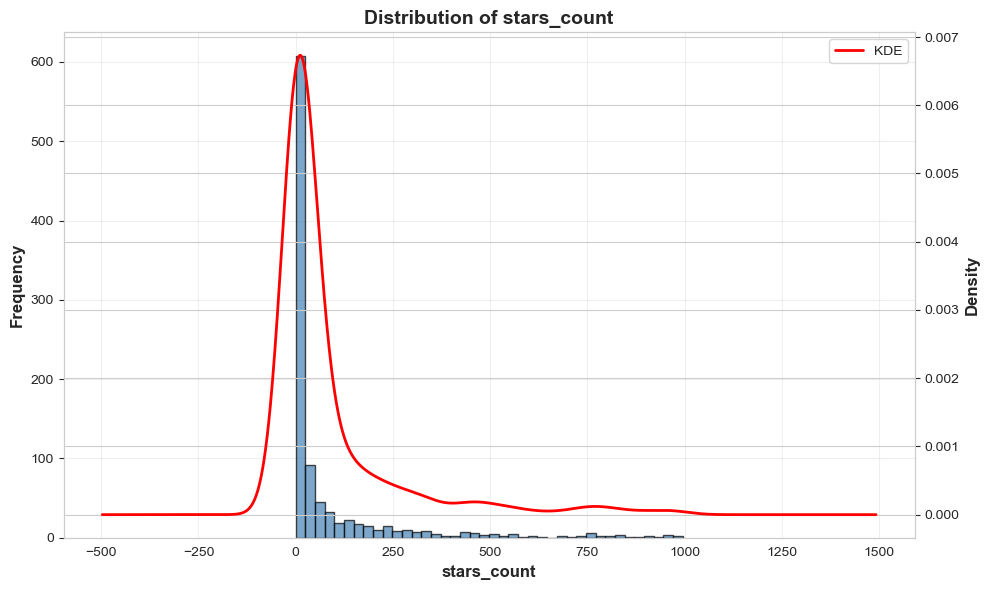

In [88]:

# Histogram: stars_count
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_analysis['stars_count'], bins=40, alpha=0.7, color='steelblue', edgecolor='black')
ax2 = ax.twinx()
df_analysis['stars_count'].plot(kind='kde', ax=ax2, color='red', linewidth=2, label='KDE')
ax.set_xlabel('stars_count', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_ylabel('Density', fontsize=12, fontweight='bold')
ax.set_title(f'Distribution of stars_count', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax2.legend()
plt.tight_layout()
plt.savefig(f'../visualizations/univariate_plots/histograms/histogram_stars_count.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: histogram_stars_count.png")
plt.show()


✅ Saved: histogram_forks_count.png


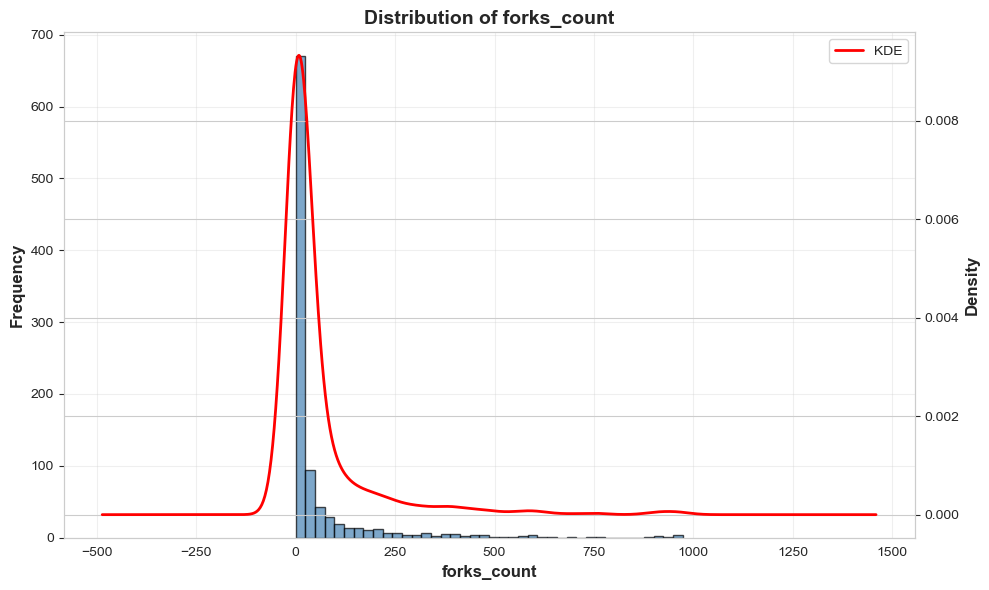

In [89]:

# Histogram: forks_count
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_analysis['forks_count'], bins=40, alpha=0.7, color='steelblue', edgecolor='black')
ax2 = ax.twinx()
df_analysis['forks_count'].plot(kind='kde', ax=ax2, color='red', linewidth=2, label='KDE')
ax.set_xlabel('forks_count', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_ylabel('Density', fontsize=12, fontweight='bold')
ax.set_title(f'Distribution of forks_count', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax2.legend()
plt.tight_layout()
plt.savefig(f'../visualizations/univariate_plots/histograms/histogram_forks_count.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: histogram_forks_count.png")
plt.show()


✅ Saved: histogram_issues_count.png


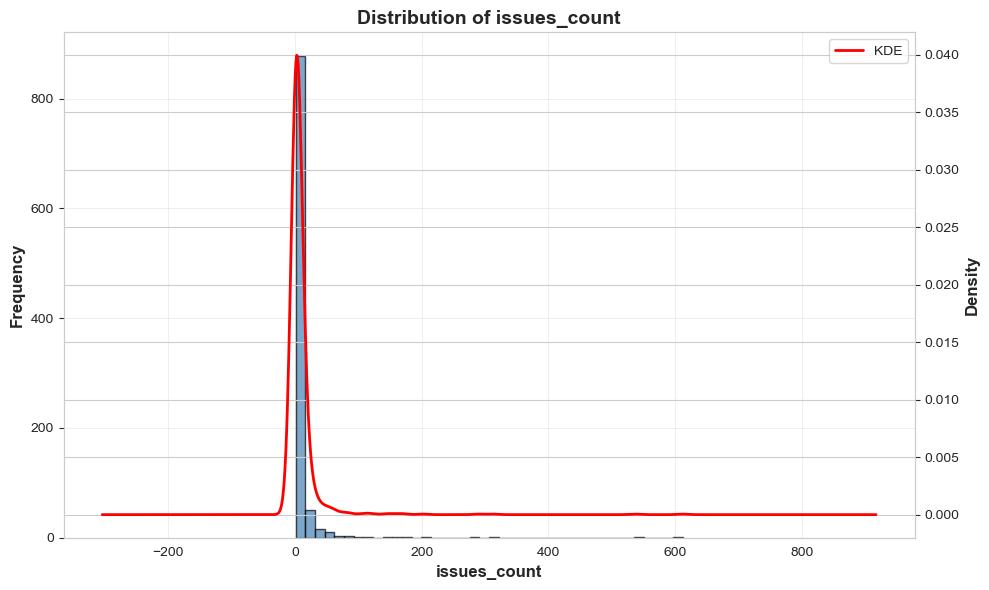

In [90]:

# Histogram: issues_count
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_analysis['issues_count'], bins=40, alpha=0.7, color='steelblue', edgecolor='black')
ax2 = ax.twinx()
df_analysis['issues_count'].plot(kind='kde', ax=ax2, color='red', linewidth=2, label='KDE')
ax.set_xlabel('issues_count', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_ylabel('Density', fontsize=12, fontweight='bold')
ax.set_title(f'Distribution of issues_count', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax2.legend()
plt.tight_layout()
plt.savefig(f'../visualizations/univariate_plots/histograms/histogram_issues_count.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: histogram_issues_count.png")
plt.show()


✅ Saved: histogram_pull_requests.png


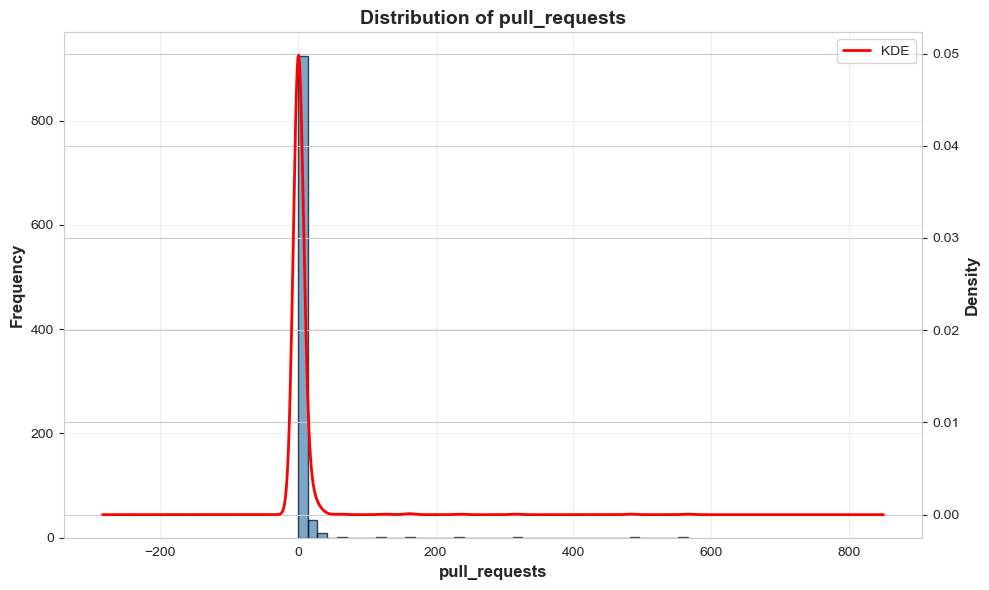

In [91]:

# Histogram: pull_requests
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_analysis['pull_requests'], bins=40, alpha=0.7, color='steelblue', edgecolor='black')
ax2 = ax.twinx()
df_analysis['pull_requests'].plot(kind='kde', ax=ax2, color='red', linewidth=2, label='KDE')
ax.set_xlabel('pull_requests', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_ylabel('Density', fontsize=12, fontweight='bold')
ax.set_title(f'Distribution of pull_requests', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax2.legend()
plt.tight_layout()
plt.savefig(f'../visualizations/univariate_plots/histograms/histogram_pull_requests.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: histogram_pull_requests.png")
plt.show()


✅ Saved: histogram_contributors.png


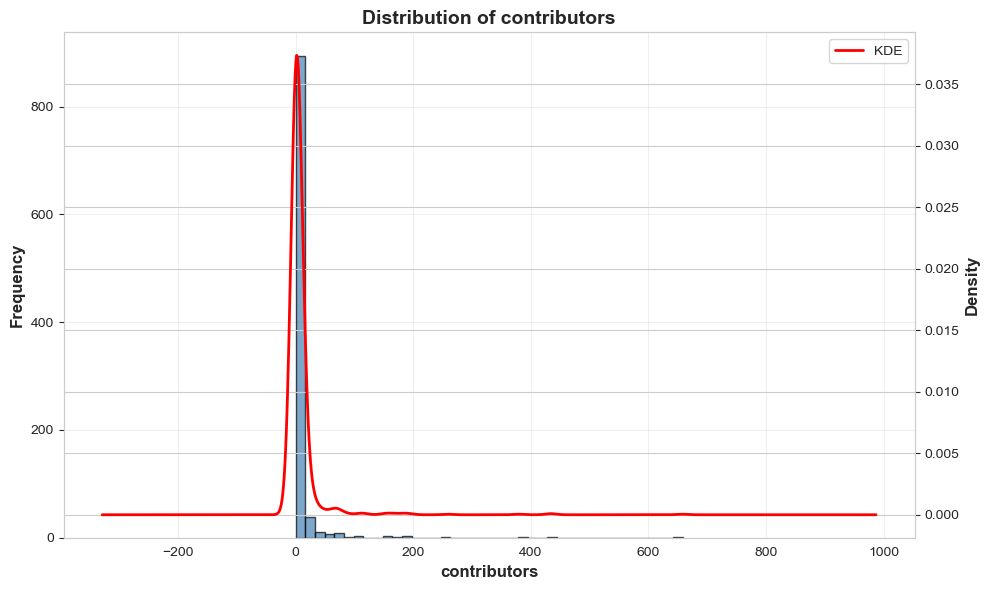

In [92]:

# Histogram: contributors
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_analysis['contributors'], bins=40, alpha=0.7, color='steelblue', edgecolor='black')
ax2 = ax.twinx()
df_analysis['contributors'].plot(kind='kde', ax=ax2, color='red', linewidth=2, label='KDE')
ax.set_xlabel('contributors', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_ylabel('Density', fontsize=12, fontweight='bold')
ax.set_title(f'Distribution of contributors', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax2.legend()
plt.tight_layout()
plt.savefig(f'../visualizations/univariate_plots/histograms/histogram_contributors.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: histogram_contributors.png")
plt.show()



## Step 10. Univariate Analysis: Boxplots & Quartiles

Identify outliers and quartile distributions.


✅ Saved: boxplot_stars_count.png


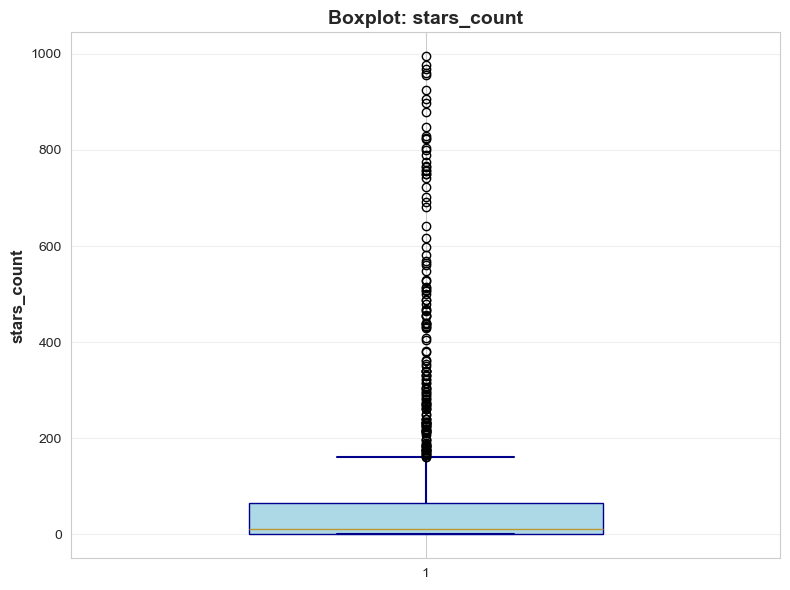

In [93]:

# Boxplot: stars_count
fig, ax = plt.subplots(figsize=(8, 6))
bp = ax.boxplot(df_analysis['stars_count'], vert=True, patch_artist=True, widths=0.5)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][0].set_edgecolor('darkblue')
for whisker in bp['whiskers']:
    whisker.set(linewidth=1.5, color='darkblue')
for cap in bp['caps']:
    cap.set(linewidth=1.5, color='darkblue')
ax.set_ylabel('stars_count', fontsize=12, fontweight='bold')
ax.set_title(f'Boxplot: stars_count', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(f'../visualizations/univariate_plots/boxplots/boxplot_stars_count.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: boxplot_stars_count.png")
plt.show()


✅ Saved: boxplot_forks_count.png


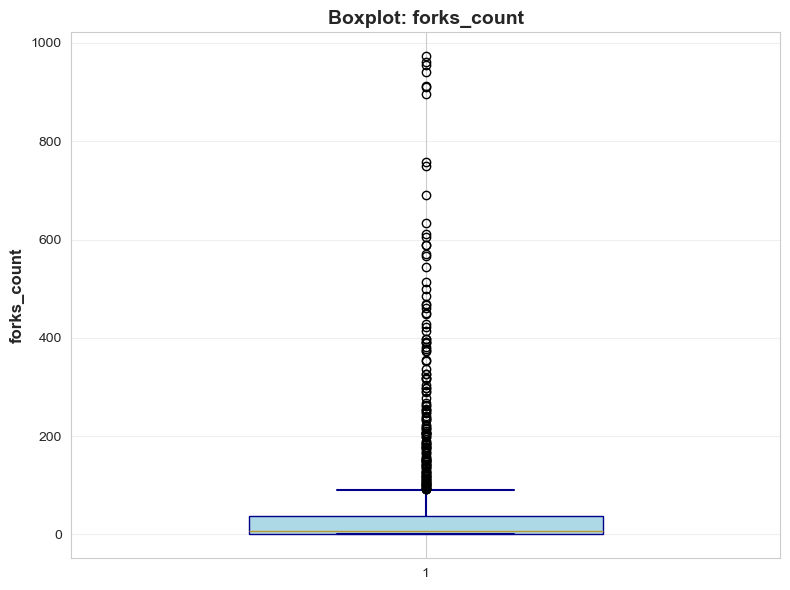

In [94]:

# Boxplot: forks_count
fig, ax = plt.subplots(figsize=(8, 6))
bp = ax.boxplot(df_analysis['forks_count'], vert=True, patch_artist=True, widths=0.5)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][0].set_edgecolor('darkblue')
for whisker in bp['whiskers']:
    whisker.set(linewidth=1.5, color='darkblue')
for cap in bp['caps']:
    cap.set(linewidth=1.5, color='darkblue')
ax.set_ylabel('forks_count', fontsize=12, fontweight='bold')
ax.set_title(f'Boxplot: forks_count', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(f'../visualizations/univariate_plots/boxplots/boxplot_forks_count.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: boxplot_forks_count.png")
plt.show()


✅ Saved: boxplot_issues_count.png


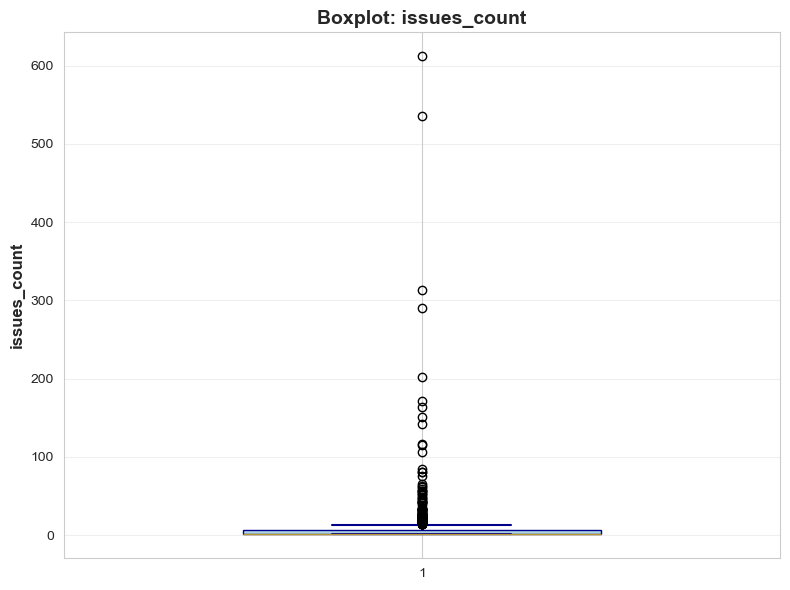

In [95]:

# Boxplot: issues_count
fig, ax = plt.subplots(figsize=(8, 6))
bp = ax.boxplot(df_analysis['issues_count'], vert=True, patch_artist=True, widths=0.5)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][0].set_edgecolor('darkblue')
for whisker in bp['whiskers']:
    whisker.set(linewidth=1.5, color='darkblue')
for cap in bp['caps']:
    cap.set(linewidth=1.5, color='darkblue')
ax.set_ylabel('issues_count', fontsize=12, fontweight='bold')
ax.set_title(f'Boxplot: issues_count', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(f'../visualizations/univariate_plots/boxplots/boxplot_issues_count.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: boxplot_issues_count.png")
plt.show()


✅ Saved: boxplot_pull_requests.png


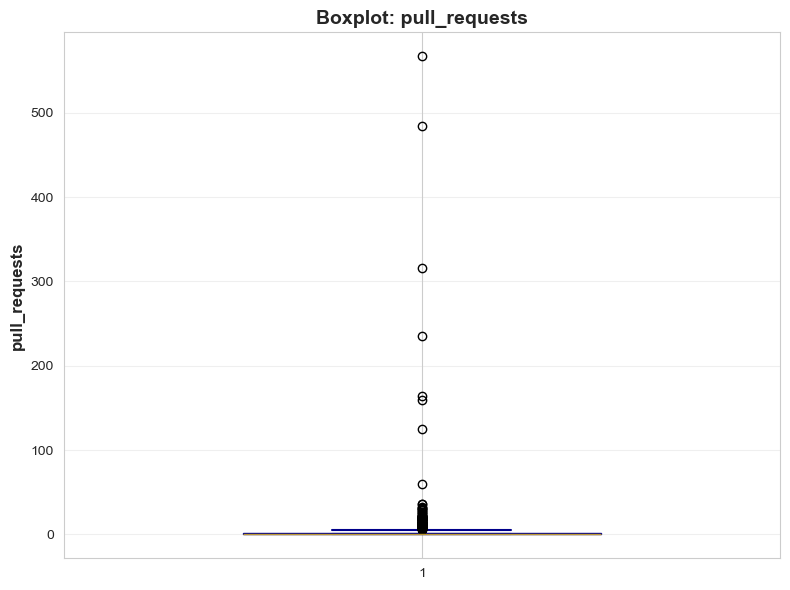

In [96]:

# Boxplot: pull_requests
fig, ax = plt.subplots(figsize=(8, 6))
bp = ax.boxplot(df_analysis['pull_requests'], vert=True, patch_artist=True, widths=0.5)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][0].set_edgecolor('darkblue')
for whisker in bp['whiskers']:
    whisker.set(linewidth=1.5, color='darkblue')
for cap in bp['caps']:
    cap.set(linewidth=1.5, color='darkblue')
ax.set_ylabel('pull_requests', fontsize=12, fontweight='bold')
ax.set_title(f'Boxplot: pull_requests', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(f'../visualizations/univariate_plots/boxplots/boxplot_pull_requests.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: boxplot_pull_requests.png")
plt.show()


✅ Saved: boxplot_contributors.png


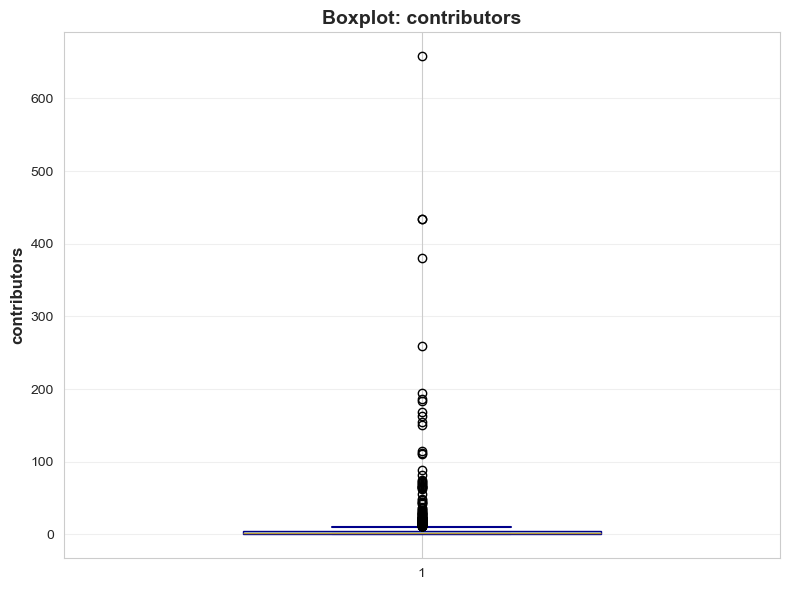

In [97]:

# Boxplot: contributors
fig, ax = plt.subplots(figsize=(8, 6))
bp = ax.boxplot(df_analysis['contributors'], vert=True, patch_artist=True, widths=0.5)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][0].set_edgecolor('darkblue')
for whisker in bp['whiskers']:
    whisker.set(linewidth=1.5, color='darkblue')
for cap in bp['caps']:
    cap.set(linewidth=1.5, color='darkblue')
ax.set_ylabel('contributors', fontsize=12, fontweight='bold')
ax.set_title(f'Boxplot: contributors', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(f'../visualizations/univariate_plots/boxplots/boxplot_contributors.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: boxplot_contributors.png")
plt.show()



## Step 11. Bivariate Analysis: Correlation Matrix

Explore relationships between key metrics.


✅ Saved: correlation_heatmap.png


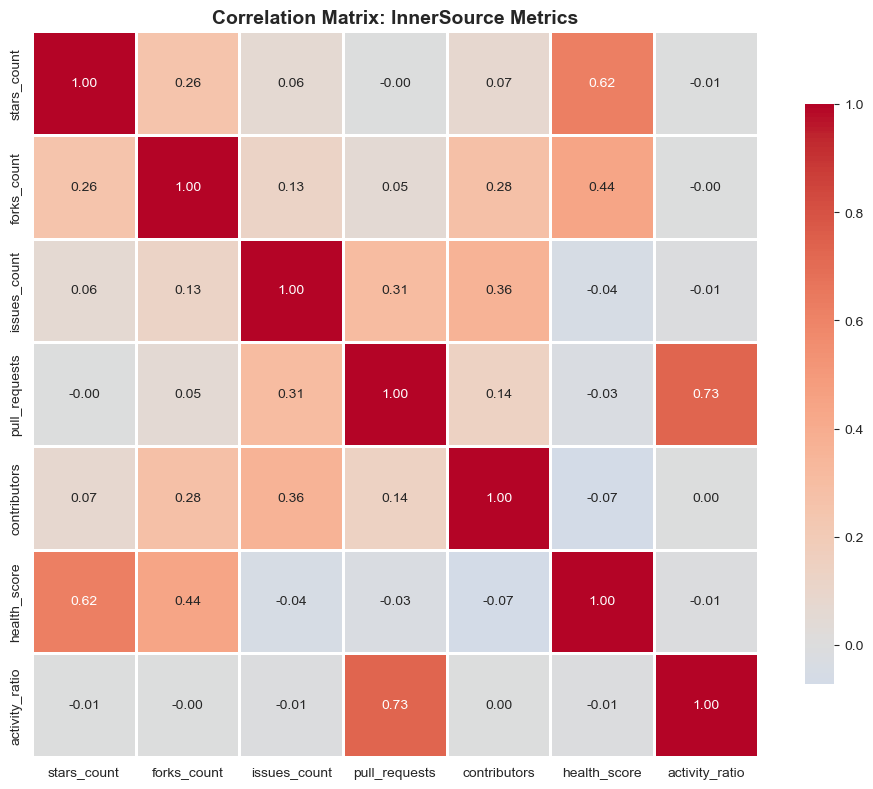


📊 Strong Correlations (|r| > 0.5):
  • stars_count ↔ health_score: 0.622
  • pull_requests ↔ activity_ratio: 0.731


In [98]:

# Correlation heatmap
correlation_cols = ['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors', 'health_score', 'activity_ratio']
corr_matrix = df_analysis[correlation_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix: InnerSource Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../visualizations/correlation_heatmap/correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✅ Saved: correlation_heatmap.png")
plt.show()

# Print high correlations
print("\n📊 Strong Correlations (|r| > 0.5):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            print(f"  • {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")



## Step 12. Repository Segmentation: Health vs Activity

Identify different types of InnerSource communities.


✅ Saved: health_activity_segmentation.png


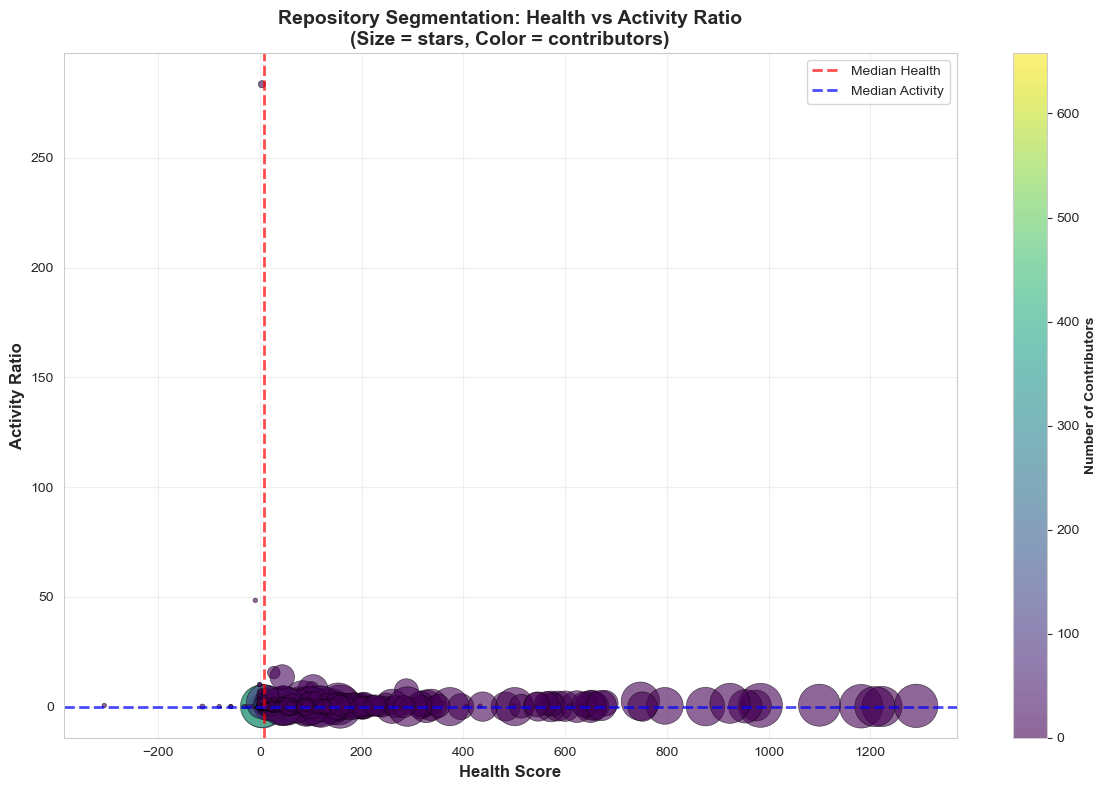


📊 REPOSITORY SEGMENTATION:
  Q1 - Thriving (High Health, High Activity): 248 repos (25.5%)
  Q2 - Emerging (Low Health, High Activity): 153 repos (15.7%)
  Q3 - At Risk (Low Health, Low Activity): 333 repos (34.3%)
  Q4 - Stable (High Health, Low Activity): 238 repos (24.5%)


In [ ]:

# Segmentation plot: Health Score vs Activity Ratio
fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(df_analysis['health_score'], df_analysis['activity_ratio'], 
                     c=df_analysis['contributors'], s=df_analysis['stars_count']+10, 
                     alpha=0.6, cmap='viridis', edgecolors='black', linewidth=0.5)

# Add quadrant lines
median_health = df_analysis['health_score'].median()
median_activity = df_analysis['activity_ratio'].median()
ax.axvline(median_health, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Median Health')
ax.axhline(median_activity, color='blue', linestyle='--', linewidth=2, alpha=0.7, label='Median Activity')

ax.set_xlabel('Health Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Activity Ratio', fontsize=12, fontweight='bold')
ax.set_title('Repository Segmentation: Health vs Activity Ratio\n(Size = stars, Color = contributors)',
            fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Number of Contributors', fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/segmentation_plots/health_activity_segmentation.png', dpi=300, bbox_inches='tight')
print("✅ Saved: health_activity_segmentation.png")
plt.show()

# Categorize quadrants
quadrant_names = {
    'Q1': 'Thriving (High Health, High Activity)',
    'Q2': 'Emerging (Low Health, High Activity)',
    'Q3': 'At Risk (Low Health, Low Activity)',
    'Q4': 'Stable (High Health, Low Activity)'
}

print("\n📊 REPOSITORY SEGMENTATION:")
for q, name in quadrant_names.items():
    if q == 'Q1':
        mask = (df_analysis['health_score'] > median_health) & (df_analysis['activity_ratio'] > median_activity)
    elif q == 'Q2':
        mask = (df_analysis['health_score'] <= median_health) & (df_analysis['activity_ratio'] > median_activity)
    elif q == 'Q3':
        mask = (df_analysis['health_score'] <= median_health) & (df_analysis['activity_ratio'] <= median_activity)
    else:
        mask = (df_analysis['health_score'] > median_health) & (df_analysis['activity_ratio'] <= median_activity)

    count = mask.sum()
    pct = (count / len(df_analysis)) * 100
    print(f"  {q} - {name}: {count} repos ({pct:.1f}%)")



## Step 13. Analysis by Research Questions

### Q1: Key metrics distinguishing healthy vs stagnant communities


✅ Saved: Q1_healthy_vs_unhealthy.png


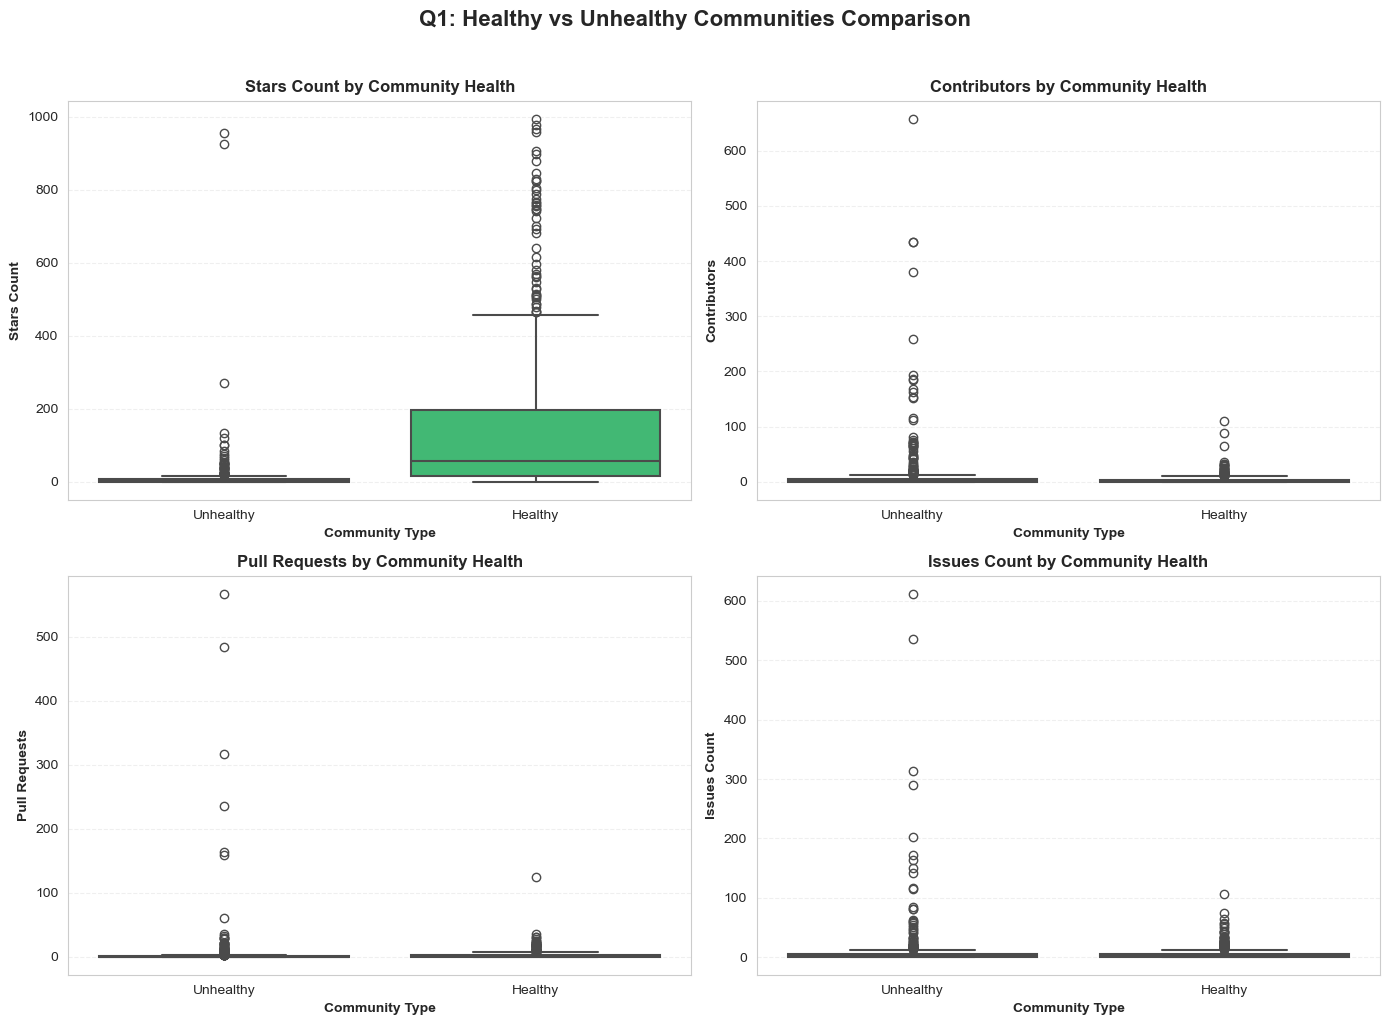

In [105]:
# Q1: Healthy vs Unhealthy Communities Comparison
metrics = ['stars_count', 'contributors', 'pull_requests', 'issues_count']

colors = {
    'Healthy': '#2ecc71',      # Green
    'Unhealthy': '#e74c3c'     # Red
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    
    sns.boxplot(
        data=df_analysis,
        x='health_category',
        y=metric,
        order=['Unhealthy', 'Healthy'],
        palette=[colors['Unhealthy'], colors['Healthy']],
        ax=ax,
        linewidth=1.5
    )
    
    ax.set_title(f'{metric.replace("_", " ").title()} by Community Health', fontweight='bold', fontsize=12)
    ax.set_xlabel('Community Type', fontweight='bold')
    ax.set_ylabel(metric.replace("_", " ").title(), fontweight='bold')
    ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.suptitle('Q1: Healthy vs Unhealthy Communities Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../visualizations/segmentation_plots/Q1_healthy_vs_unhealthy.png', dpi=300, bbox_inches='tight')
print("✅ Saved: Q1_healthy_vs_unhealthy.png")
plt.show()


### Q2: Relationship between active contributors and responsiveness

✅ Saved: Q2_contributors_vs_responsiveness.png


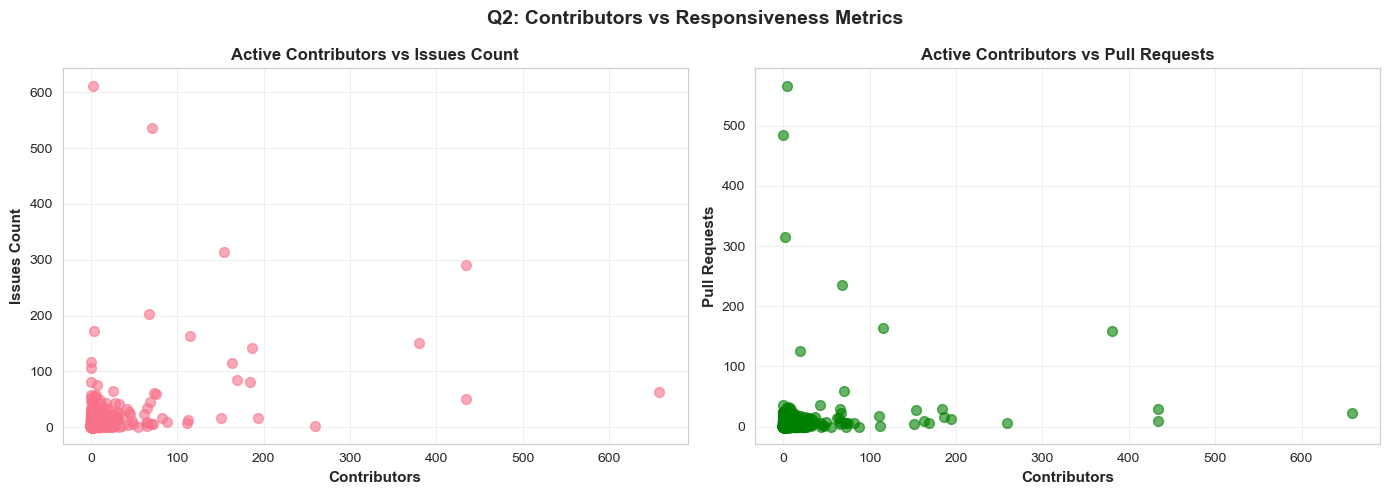


📊 Q2 Correlations:
  • Contributors ↔ Issues: 0.363
  • Contributors ↔ PRs: 0.141


In [ ]:

# Scatter: contributors vs responsiveness metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Contributors vs Issues
axes[0].scatter(df_analysis['contributors'], df_analysis['issues_count'], alpha=0.6, s=50)
axes[0].set_xlabel('Contributors', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Issues Count', fontsize=11, fontweight='bold')
axes[0].set_title('Active Contributors vs Issues Count', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Contributors vs Pull Requests
axes[1].scatter(df_analysis['contributors'], df_analysis['pull_requests'], alpha=0.6, s=50, color='green')
axes[1].set_xlabel('Contributors', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Pull Requests', fontsize=11, fontweight='bold')
axes[1].set_title('Active Contributors vs Pull Requests', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.suptitle('Q2: Contributors vs Responsiveness Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../visualizations/bivariate_plots/scatterplots/Q2_contributors_vs_responsiveness.png', dpi=300, bbox_inches='tight')
print("✅ Saved: Q2_contributors_vs_responsiveness.png")
plt.show()

# Compute correlation
corr_contrib_issues = df_analysis['contributors'].corr(df_analysis['issues_count'])
corr_contrib_prs = df_analysis['contributors'].corr(df_analysis['pull_requests'])
print(f"\n📊 Q2 Correlations:")
print(f"  • Contributors ↔ Issues: {corr_contrib_issues:.3f}")
print(f"  • Contributors ↔ PRs: {corr_contrib_prs:.3f}")


### Q3: Actionable patterns for sustainable InnerSource

✅ Saved: Q3_metric_distributions.png


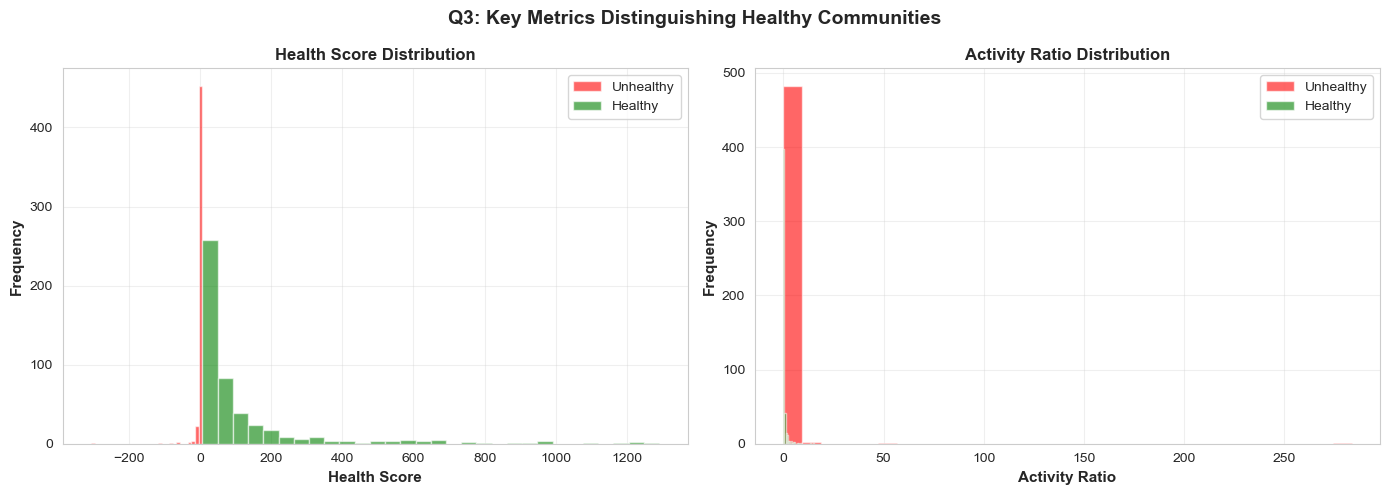


📊 Q3 Actionable Insights:
  • Healthy projects avg health_score: 121.25 vs Unhealthy: -0.38
  • Healthy projects avg activity_ratio: 0.49 vs Unhealthy: 0.98


In [ ]:

# Distribution comparison: Healthy vs Unhealthy on derived metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Health Score distribution
healthy_data = df_analysis[df_analysis['health_category'] == 'Healthy']['health_score']
unhealthy_data = df_analysis[df_analysis['health_category'] == 'Unhealthy']['health_score']

axes[0].hist(unhealthy_data, bins=30, alpha=0.6, label='Unhealthy', color='red')
axes[0].hist(healthy_data, bins=30, alpha=0.6, label='Healthy', color='green')
axes[0].set_xlabel('Health Score', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0].set_title('Health Score Distribution', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Activity Ratio distribution
healthy_activity = df_analysis[df_analysis['health_category'] == 'Healthy']['activity_ratio']
unhealthy_activity = df_analysis[df_analysis['health_category'] == 'Unhealthy']['activity_ratio']

axes[1].hist(unhealthy_activity, bins=30, alpha=0.6, label='Unhealthy', color='red')
axes[1].hist(healthy_activity, bins=30, alpha=0.6, label='Healthy', color='green')
axes[1].set_xlabel('Activity Ratio', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1].set_title('Activity Ratio Distribution', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('Q3: Key Metrics Distinguishing Healthy Communities', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../visualizations/segmentation_plots/Q3_metric_distributions.png', dpi=300, bbox_inches='tight')
print("✅ Saved: Q3_metric_distributions.png")
plt.show()

print("\n📊 Q3 Actionable Insights:")
print(f"  • Healthy projects avg health_score: {healthy_data.mean():.2f} vs Unhealthy: {unhealthy_data.mean():.2f}")
print(f"  • Healthy projects avg activity_ratio: {healthy_activity.mean():.2f} vs Unhealthy: {unhealthy_activity.mean():.2f}")


## Step 14. Export Cleaned & Analyzed Dataset

In [ ]:

# Save the complete analysis dataset
df_analysis.to_csv('../data/processed/github_dataset_analysis.csv', index=False)
print("✅ Saved: github_dataset_analysis.csv")

# Save summary statistics for reporting
summary_stats_full.to_csv('../data/processed/summary_statistics.csv')
print("✅ Saved: summary_statistics.csv")

print(f"\n✅ Analysis complete!")
print(f"\nFinal dataset shape: {df_analysis.shape}")
print(f"Files saved to ../data/processed/ and ../visualizations/")


✅ Saved: github_dataset_analysis.csv
✅ Saved: summary_statistics.csv

✅ Analysis complete!

Final dataset shape: (972, 22)
Files saved to ../data/processed/ and ../visualizations/
